# BANKNIFTY HISTORICAL DATA ANALYSIS
Sathyanarayan Rao, PhD

### import relevant libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


### import the data as a pandas data frame

In [2]:
dataFrame = pd.read_excel('Banknifty.xlsx'); # downloaded from yahoo finance
dataFrame = dataFrame.dropna(); # drop null valued rows

In [3]:
len(dataFrame)


1229

In [4]:
dataFrame.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1231,2022-04-29,36474.050781,36718.800781,35978.949219,36088.148438,36088.148438,172700.0
1232,2022-05-02,35627.601563,36235.250000,35618.199219,36163.750000,36163.750000,170200.0
1233,2022-05-04,36266.148438,36309.300781,35127.851563,35264.550781,35264.550781,214600.0
1234,2022-05-05,35705.351563,35934.851563,35133.800781,35232.851563,35232.851563,167300.0
1235,2022-05-06,34569.101563,34797.949219,34353.199219,34591.199219,34591.199219,199200.0


### lets try to add some additional columns 

- First lets add a column named weekday computed from date column
- Second, I would like to add a column named range = high-low 
- Third, based on range, we would classify market into sideways, bullish and bearish, so a market type column
- For market type column, we may need a bit of statistics

In [5]:
dataFrame['Date'] = pd.to_datetime(dataFrame['Date']);
dataFrame["WeekDay"] = dataFrame["Date"].dt.weekday

In [6]:
dataFrame.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,WeekDay
1231,2022-04-29,36474.050781,36718.800781,35978.949219,36088.148438,36088.148438,172700.0,4
1232,2022-05-02,35627.601563,36235.250000,35618.199219,36163.750000,36163.750000,170200.0,0
1233,2022-05-04,36266.148438,36309.300781,35127.851563,35264.550781,35264.550781,214600.0,2
1234,2022-05-05,35705.351563,35934.851563,35133.800781,35232.851563,35232.851563,167300.0,3
1235,2022-05-06,34569.101563,34797.949219,34353.199219,34591.199219,34591.199219,199200.0,4


In [7]:
dataFrame["R_HL"] = dataFrame["High"]-dataFrame["Low"]; # range from high to low
dataFrame["R_OC"] = abs(dataFrame["Open"]-dataFrame["Close"]); # range from open to close

conditions = [dataFrame["Open"] < dataFrame["Close"],dataFrame["Open"] > dataFrame["Close"]]
dataFrame["type"] = np.select(conditions, ['bull','bear'], default='Tie')
        
dataFrame.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,WeekDay,R_HL,R_OC,type
1231,2022-04-29,36474.050781,36718.800781,35978.949219,36088.148438,36088.148438,172700.0,4,739.851562,385.902343,bear
1232,2022-05-02,35627.601563,36235.250000,35618.199219,36163.750000,36163.750000,170200.0,0,617.050781,536.148437,bull
1233,2022-05-04,36266.148438,36309.300781,35127.851563,35264.550781,35264.550781,214600.0,2,1181.449218,1001.597657,bear
1234,2022-05-05,35705.351563,35934.851563,35133.800781,35232.851563,35232.851563,167300.0,3,801.050782,472.500000,bear
1235,2022-05-06,34569.101563,34797.949219,34353.199219,34591.199219,34591.199219,199200.0,4,444.750000,22.097656,bull


### Lets just see the distribution of the ranges (high to low and open to close)

In [17]:
def get_histogram(data,nbin):
    bins, edges = np.histogram(data, nbin);
    left, right = edges[:-1], edges[1:];
    X = np.array([left, right]).T.flatten();
    Y = np.array([bins, bins]).T.flatten();
    return X,Y

In [29]:
nbin = (dataFrame["R_OC"].max()-dataFrame["R_OC"].min())/len(dataFrame["R_OC"]);
print(nbin)



1.9897051724979615


(array([192., 179., 159., 115., 112.,  86.,  69.,  67.,  44.,  37.,  33.,
         30.,  14.,  25.,   3.,   8.,   7.,  13.,   5.,   4.,   5.,   4.,
          3.,   2.,   4.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([3.51562000e-01, 4.92585151e+01, 9.81654683e+01, 1.47072421e+02,
        1.95979375e+02, 2.44886328e+02, 2.93793281e+02, 3.42700234e+02,
        3.91607187e+02, 4.40514140e+02, 4.89421093e+02, 5.38328047e+02,
        5.87235000e+02, 6.36141953e+02, 6.85048906e+02, 7.33955859e+02,
        7.82862812e+02, 8.31769765e+02, 8.80676719e+02, 9.29583672e+02,
        9.78490625e+02, 1.02739758e+03, 1.07630453e+03, 1.12521148e+03,
        1.17411844e+03, 1.22302539e+03, 1.27193234e+03, 1.32083930e+03,
        1.36974625e+03, 1.41865320e+03, 1.46756016e+03, 1.51646711e+03,
        1.56537406e+03, 1.61428102e+03, 1.66318797e+03, 1.71209492e+03,
        1.

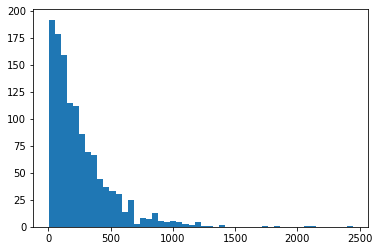

In [9]:
X1,Y1 = get_histogram(dataFrame["R_OC"], nbin);
X2,Y2 = get_histogram(dataFrame["R_HL"], 50);


fig1, ax = plt.subplots(nrows=1,ncols=1,dpi=100,figsize=(8,4))
ax.plot(X1,Y2,label='range from open to close');
ax.plot(X2,Y2, label= 'range from low to high');
ax.legend()

plt.hist(dataFrame["R_OC"], 50)
